## Transfer learn with one cycle policy

The aim of this code is to implement the Leslie Smiths one-cycle policy as implemented in fastai and check how it comapres to using a annealed learning rate (which is the default setting for the fit() in fastai).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import pickle
import os

%matplotlib inline

In [2]:
import pixiedust

Pixiedust database opened successfully


In [3]:
from models import *
from utils import *
from data import *


/usr/local/home/akn36d/projects/pytorch_learn/transfer_learning/models.py:12: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


In [35]:
#%%pixie_debugger 
fold_num = 4
suite_fname1 = os.path.join('Model_runs', 'tvm_resnet34_R03_rCycles1') 
suite_fname2 = os.path.join('Model_runs', 'tvm_resnet34_R03_rPlainfit1') 

# Pickle the metrics and loss vals
with open(os.path.join(suite_fname1,'train_info_fld{}.pkl'.format(fold_num)), 'rb') as f:
    [net_lrs1, net_losses1, net_val_losses1, net_metrics1] = [x.numpy() if not isinstance(x, np.ndarray) else x 
                                                              for x in pickle.load(f)]
    
with open(os.path.join(suite_fname2,'train_info_fld{}.pkl'.format(fold_num)), 'rb') as f:
    [net_lrs2, net_losses2, net_val_losses2, net_metrics2] = [np.asarray(x).flatten() if not isinstance(x, np.ndarray) else x 
                                                              for x in pickle.load(f)]
    

net_metrics1 = net_metrics1.reshape(-1,)

In [36]:
print(20*'-')
print('lrs1 : {}, lrs2 : {}'.format(type(net_lrs1), type(net_lrs2)))
print('losses1 : {}, losses2 : {}'.format(type(net_losses1), type(net_losses2)))
print('val_losses1 : {}, val_losses2 : {}'.format(type(net_val_losses1), type(net_val_losses2)))
print('metrics1 : {}, metrics2 : {}'.format(type(net_metrics1), type(net_metrics2)))
print(20*'-')
print('lrs1 : {}, lrs2 : {}'.format(net_lrs1.shape, net_lrs2.shape))
print('losses1 : {}, losses2 : {}'.format(net_losses1.shape, net_losses2.shape))
print('val_losses1 : {}, val_losses2 : {}'.format(net_val_losses1.shape, net_val_losses2.shape))
print('metrics1 : {}, metrics2 : {}'.format(net_metrics1.shape, net_metrics2.shape))
print(20*'-')

--------------------
lrs1 : <class 'numpy.ndarray'>, lrs2 : <class 'numpy.ndarray'>
losses1 : <class 'numpy.ndarray'>, losses2 : <class 'numpy.ndarray'>
val_losses1 : <class 'numpy.ndarray'>, val_losses2 : <class 'numpy.ndarray'>
metrics1 : <class 'numpy.ndarray'>, metrics2 : <class 'numpy.ndarray'>
--------------------
lrs1 : (1416,), lrs2 : (1416,)
losses1 : (1416,), losses2 : (1416,)
val_losses1 : (6,), val_losses2 : (6,)
metrics1 : (6,), metrics2 : (6,)
--------------------


In [37]:
iterations = range_of(net_lrs1)
num_epochs = range_of(net_metrics1)

_, axs = plt.subplots(2,2, figsize=(20,10))
axs[0,0].plot(iterations, net_lrs1, '-k')
axs[0,0].plot(iterations, net_lrs2, '--r')
axs[0,0].set_title('LR vs Num_its')

axs[0,1].plot(iterations, net_losses1, '-k')
axs[0,1].plot(iterations, net_losses2, '--r')
axs[0,1].set_title('Loss vs Num_its')


axs[1,0].plot(num_epochs, net_val_losses1, '-ok')
axs[1,0].plot(num_epochs, net_val_losses2, '--dr')
axs[1,0].set_title('Val Loss vs Num_its')

axs[1,1].plot(num_epochs, net_metrics1, '-ok')
axs[1,1].plot(num_epochs, net_metrics2, '--dr')
axs[1,1].set_title('Accuracy vs Num_its')


Text(0.5, 1.0, 'Accuracy vs Num_its')

### For Fold 4

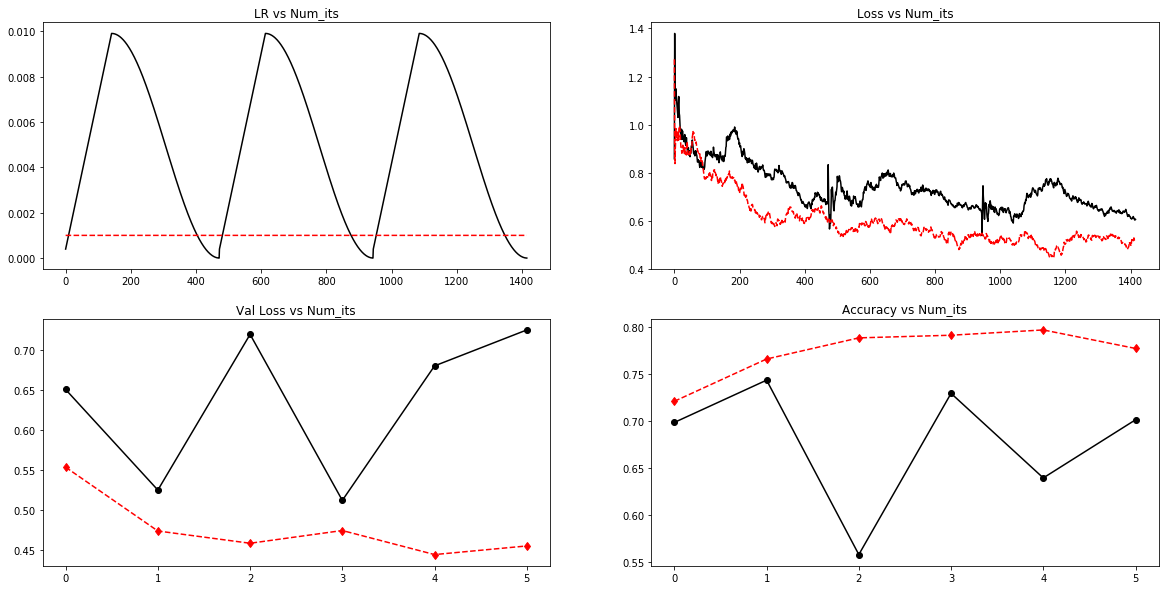

In [38]:
plt.show()

### For Fold 3

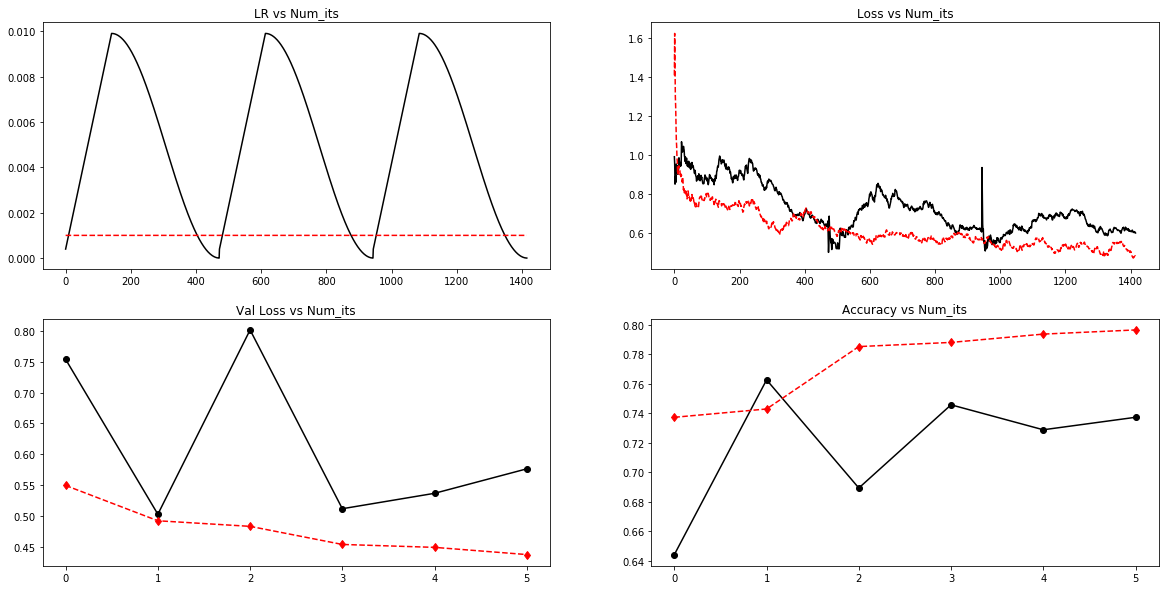

In [34]:
plt.show()

### For Fold 2

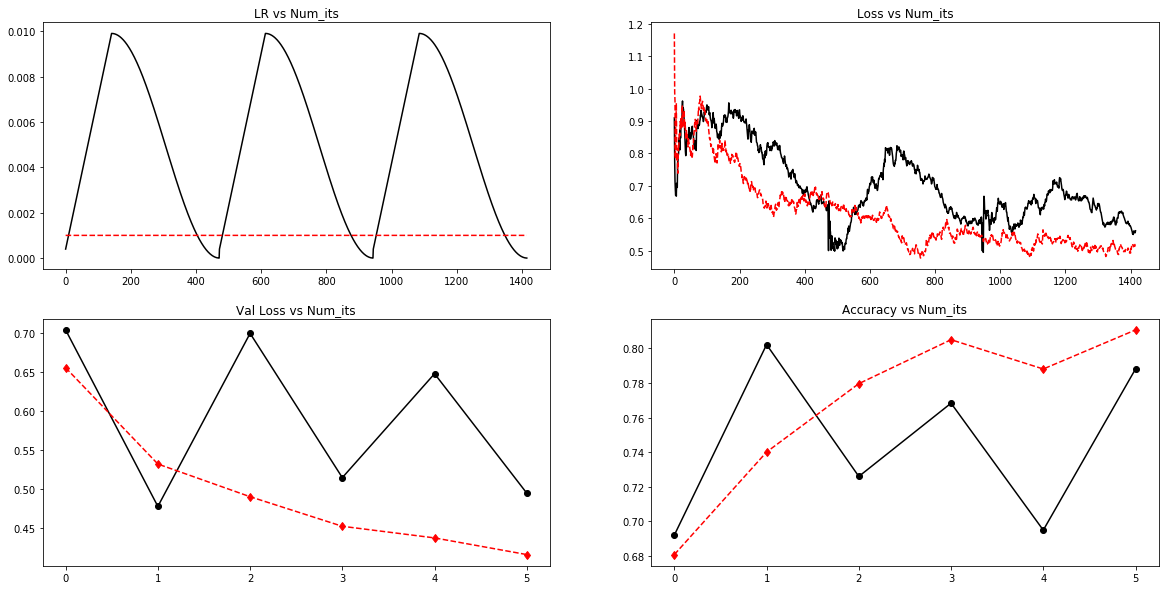

In [30]:
plt.show()

### For Fold 1

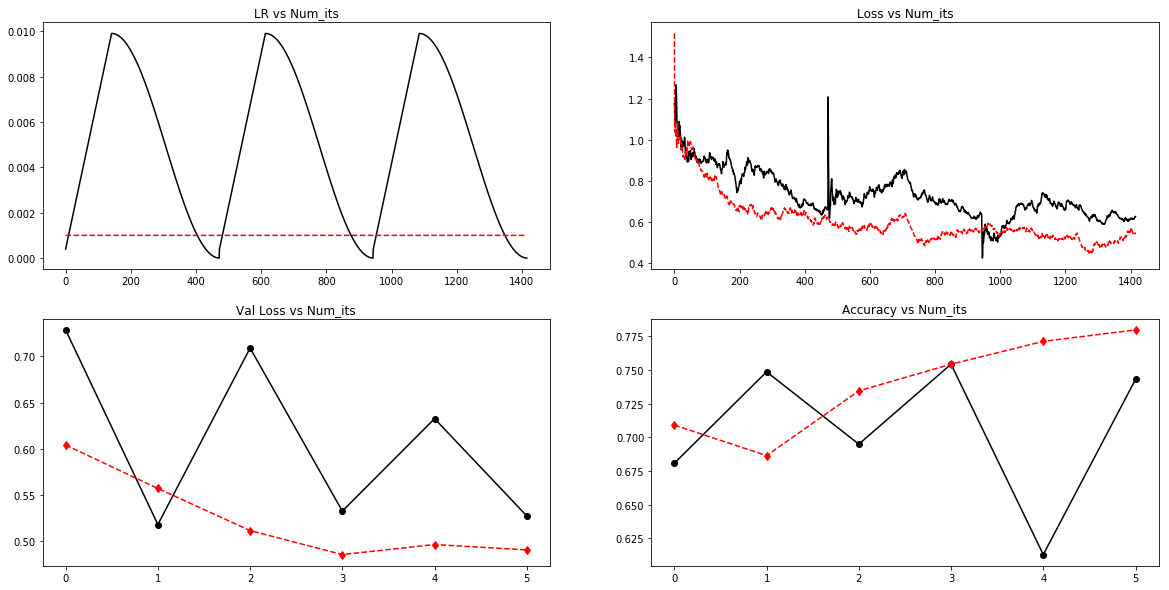

In [26]:
plt.show()

### For Fold 0

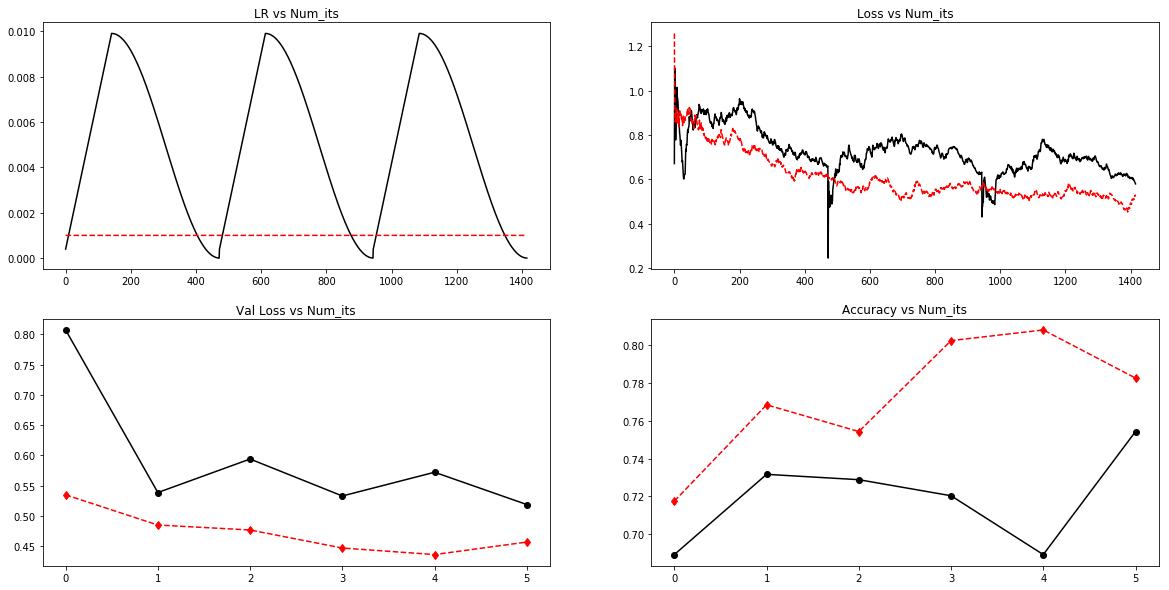

In [22]:
plt.show()